# Feature Engineering Lab

This lab will be the testing area for feature engineering. I will be using the titanic dataset for ease of use. Notes will be in the notes file.

### Complete case Analysis

In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
import pylab 
import scipy.stats as stats
import datetime
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
titanic = pd.read_csv('train.csv')
titanic 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data_cca = titanic.copy()
data_cca.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [15]:
# Check if CCA can be applied
complete_vals = data_cca.dropna().shape[0]
count_all = data_cca.shape[0]

percentage_complete = complete_vals / float(count_all)
print(f"Count of rows with values on all variables are {complete_vals} out of {count_all}.")
print(f"A percentage difference of {percentage_complete} is observed.")
      

Count of rows with values on all variables are 183 out of 891.
A percentage difference of 0.2053872053872054 is observed.


Given this, it is not suitable to use CCA here as 20% of the observations will be dropped resulting to a reduced dataset with complete observations.


---

### Mean/Median/Mode Imputation
Naming it here as ct for 'central tendency' haha

In [32]:
data_ct = titanic.copy()
data_ct.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Here above, we can see the list of variables and the percentage of missing or null fields on those columns. 

We can see that Age has about 19.87% of missing values, cabin with 77.10%, and embarked with 0.22%

Since age is a continuous variable, lets check the distribution here first.

Text(0.5, 0, 'Age')

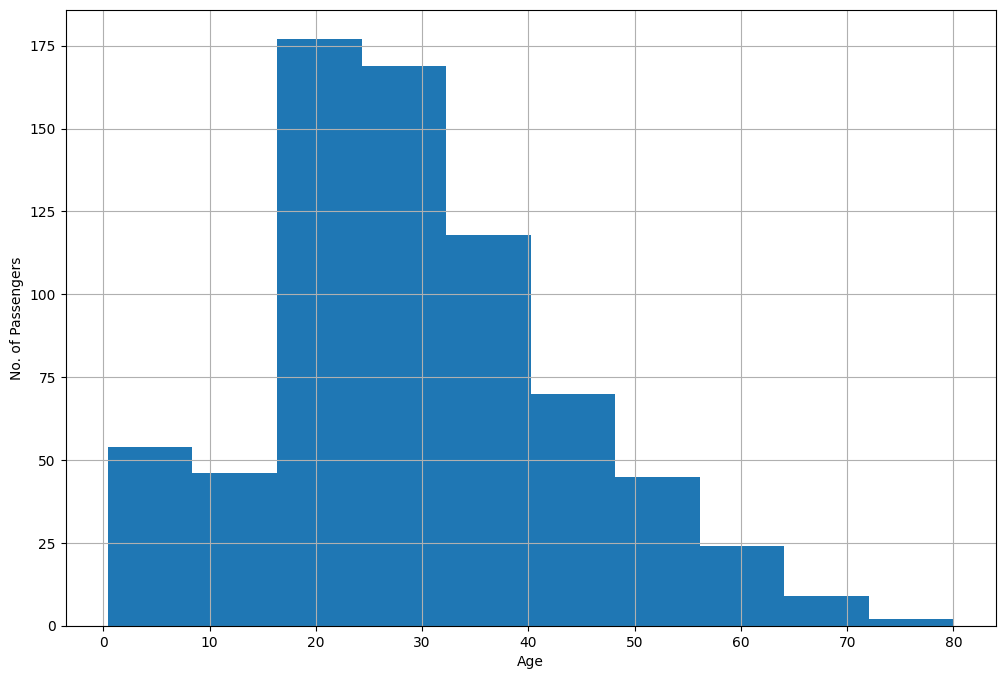

In [24]:
plt.figure(figsize = (12, 8))
fig = data_ct['Age'].hist(bins = 10)
fig.set_ylabel('No. of Passengers')
fig.set_xlabel('Age')

Since the age distributon is skewed, we will use the median imputation here. Following the notes, we will first split the data to the training at test sets. Imputation will be done in the training then propagated onto the test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_ct, data_ct['Survived'],
                                                    test_size = 0.3, 
                                                    random_state = 0)

X_train.shape, X_test.shape

((623, 12), (268, 12))

In [34]:
# Get the median
median = X_train['Age'].median()
print(median)

29.0


In [35]:
# Impute the missing values in Age in both train and test sets

for i in [X_train, X_test]:
    i['Age'].fillna(median, inplace = True)

In [36]:
# Check for missing values in age after imputation
for i in [X_train, X_test]:
    print(i['Age'].isnull().sum())

0
0


After imputing the mean in both the train and test sets, we can see that there are no missing values now for Age.

### Random Sample Imputation


In [41]:
data_rsi = titanic.copy()
data_rsi.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [42]:
#Imputation is to be done over the training set and then propagated to the test set. 
#This means that we will get the random sample from the train set
#And fill the missiung values in the train set and test set using that value

X_train, X_test, y_train, y_test = train_test_split(data_rsi, data_rsi['Survived'],
                                                    test_size = 0.3,
                                                    random_state = 0)
X_train.shape, X_test.shape

((623, 12), (268, 12))

In [51]:
#Create a function to impute 
def impute_nulls(df, var, median):
    df[var + '_median'] = df[var].fillna(median)
    df[var + '_zero'] = df[var].fillna(0)

    #random sampling for var
    df[var + 'random'] = df[var]

    #extract random sample from X_train to fill missing values
    rand_sample = X_train[var].dropna().sample(df[var].isnull().sum(),
                                               random_state = 0)
    
    #get the index to merge dataset
    rand_sample.index = df[df[var].isnull()].index
    df.loc[df[var].isnull(), var + '_random'] = rand_sample

    #finally, fill using random-sample
    df[var + '_rand_sample'] = df[var].fillna(rand_sample, inplace = True)

In [52]:
impute_nulls(X_train, 'Age', median)
X_train['Age'].isnull().sum()

np.int64(0)

In [53]:
impute_nulls(X_test, 'Age', median)
X_test['Age'].isnull().sum()

np.int64(0)

### Replacement by Arbitrary  Value

In [ ]:
data_arbi = titanic.copy()

In [55]:
X_train, X_test, y_train, y_test = train_test_split(data_arbi,
                                                    data_arbi['Survived'],
                                                    test_size = 0.3,
                                                    random_state = 0)
X_train.shape, X_test.shape

((623, 12), (268, 12))

In [63]:
#create a function to impute
# here since we decided to impute NAs with 0 or 100, this is valid
# these are not frequent in the original distribution and are at the tails

def impute_nulls_arbi(df, var):
    df[var + '_zero'] = df[var].fillna(0)
    df[var + '_hundred'] = df[var].fillna(100)

In [66]:
impute_nulls_arbi(X_train, 'Age')
impute_nulls_arbi(X_test, 'Age')
print("X_train:")
print(X_train['Age_zero'].isnull().sum())
print(X_train['Age_hundred'].isnull().sum())
print("X_test:")
print(X_test['Age_zero'].isnull().sum())
print(X_test['Age_hundred'].isnull().sum())

X_train:
0
0
X_test:
0
0


### End of Distribution Imputation

In [76]:
data_eod = titanic.copy()

In [68]:
X_train, X_test, y_train, y_test = train_test_split(data_eod,
                                                    data_eod['Survived'],
                                                    test_size = 0.3,
                                                    random_state = 0)

X_train.shape, X_test.shape

((623, 12), (268, 12))

<Axes: >

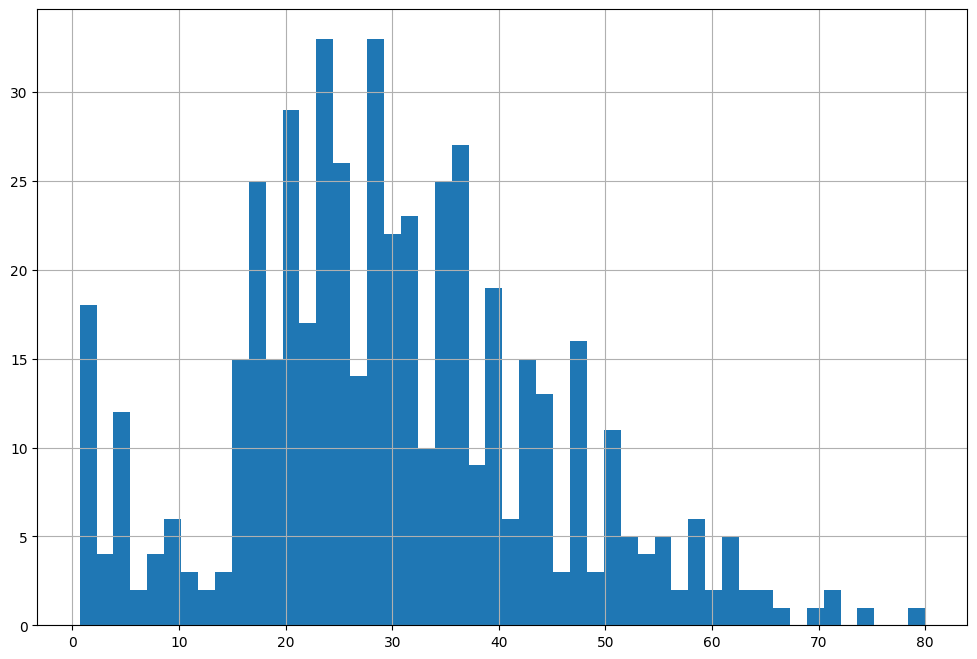

In [70]:
plt.figure(figsize=(12,8))
X_train['Age'].hist(bins = 50)

In [72]:
#Get the far end of the distribution
X_train['Age'].mean()+3*X_train['Age'].std()

np.float64(73.43632005918369)

<Axes: xlabel='Age'>

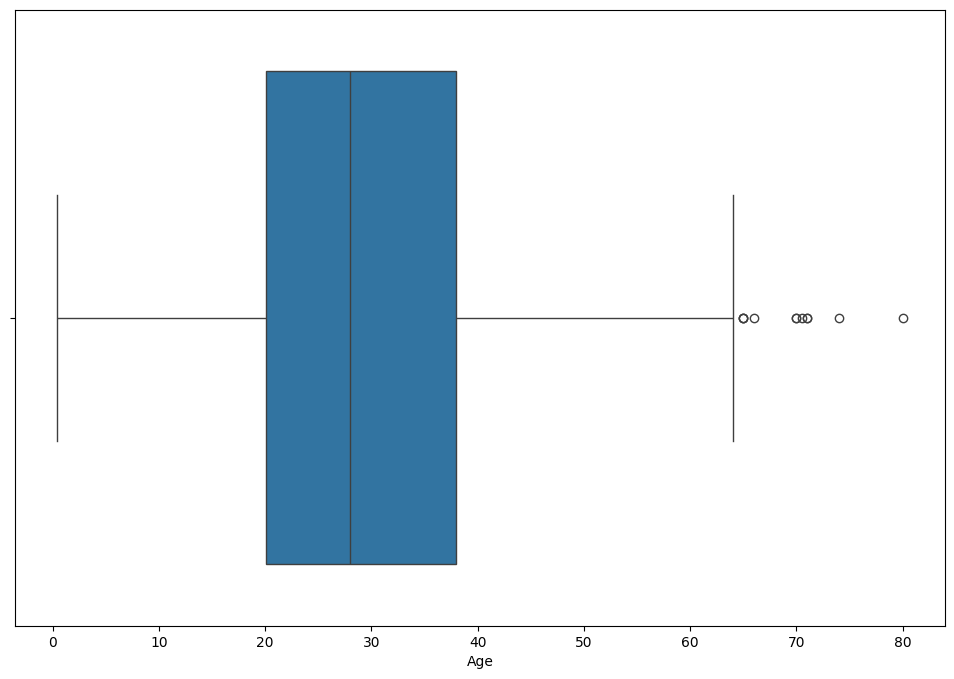

In [78]:
#Check for outliers, these will be masked when we replace NA by values at the far end
plt.figure(figsize=(12,8))
sns.boxplot(x = 'Age', data=data_eod)

In [79]:
#create a function to impute the end of distribution
def impute_na_eod(df, var, median, extreme):
    df[var + '_far_end'] = df[var].fillna(extreme)
    df[var].fillna(median, inplace = True)

In [83]:
impute_na_eod(X_train,
              'Age',
              X_train['Age'].median(),
              X_train['Age'].mean()+ 3 * X_train['Age'].std()
              )

impute_na_eod(X_test,
              'Age',
              X_train['Age'].median(),
              X_train['Age'].mean()+ 3 * X_train['Age'].std()
              )

print(X_train['Age_far_end'].isnull().sum())
print(X_test['Age_far_end'].isnull().sum())

0
0


### Missing Value Indicator

In [84]:
data_mvi = titanic.copy()

In [85]:
X_train, X_test, y_train, y_test = train_test_split(data_mvi,
                                                    data_mvi['Survived'],
                                                    test_size = 0.3,
                                                    random_state = 0
                                                    )

X_train.shape, X_test.shape

((623, 12), (268, 12))

In [ ]:
# Create new variables that indicate missingness

for i in [X_train, X_test]:
    i['Age_NA'] = np.where(i['Age'].isnull(), 1, 0)

X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,1


In [87]:
#Check mean and median if they are similar, if they are the same,
#  replace the nulls with median

X_train['Age'].mean(), X_train['Age'].median()

(np.float64(29.915338645418327), np.float64(29.0))

In [88]:
for i in [X_train, X_test]:
    i['Age'].fillna(i['Age'].median(), inplace = True)

X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,29.0,1,0,2689,14.4583,NaN,C,1


## Categorical Encoding


In [7]:
data_ce = titanic.copy()
data_ce

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### One-Hot Encoding (OHE)

In [8]:
data_ce_ohe = data_ce.copy()

In [10]:
data_ce_ohe['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [11]:
# We use get_dummies for one hot encoding
pd.get_dummies(data_ce_ohe['Sex']).head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [ ]:
#since we only have 2 labels in this category, any between female and male can be used
pd.concat([data_ce_ohe['Sex'], pd.get_dummies(data_ce_ohe['Sex'])], axis = 1).head()


,Sex,female,male
0,male,False,True
1,female,True,False
2,female,True,False
3,female,True,False
4,male,False,True


In [15]:
# get k-1 labels only
pd.get_dummies(data_ce_ohe['Sex'],
               drop_first = True
               ).head()

,male
0,True
1,False
2,False
3,False
4,True


In [18]:
#for vars with multiple labels
print(data_ce_ohe['Embarked'].unique())
data_ce_ohe['Embarked'].head()

['S' 'C' 'Q' nan]


0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [19]:
pd.get_dummies(data_ce_ohe['Embarked']).head()

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True


In [20]:
# to get k-1 for embarked
pd.get_dummies(data_ce_ohe['Embarked'],
               drop_first = True
               ).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


### Count and Frequency Encoding

In [21]:
df_train_cfe = pd.read_csv('train.csv')
df_test_cfe = pd.read_csv('test.csv')

In [22]:
df_train_cfe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
for col in df_train_cfe.columns[3:9]:
    print(col, ': ', len(df_train_cfe[col].unique()), ' labels')

Name :  891  labels
Sex :  2  labels
Age :  89  labels
SibSp :  7  labels
Parch :  7  labels
Ticket :  681  labels


In [31]:
cols_train_cfe = [i for i in df_train_cfe.columns[3:9]]
print(cols_train_cfe)

X_train, X_test, y_train, y_test = train_test_split(df_train_cfe[cols_train_cfe],
                                                    df_train_cfe['Survived'],
                                                    test_size = 0.3,
                                                    random_state = 0
                                                                 )

X_train.shape, X_test.shape

['Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket']


((623, 6), (268, 6))

In [36]:
X_train['Ticket'].value_counts().to_dict()

{'CA. 2343': 7,
 '347082': 6,
 '1601': 5,
 '4133': 4,
 '382652': 4,
 'S.O.C. 14879': 4,
 'W./C. 6608': 4,
 'CA 2144': 4,
 '19950': 3,
 'C.A. 34651': 3,
 '2666': 3,
 '29106': 3,
 '113760': 3,
 '363291': 3,
 'PC 17760': 3,
 '349909': 3,
 'SC/Paris 2123': 3,
 '113781': 3,
 '24160': 3,
 '345773': 3,
 '110152': 3,
 'C.A. 31921': 3,
 '347077': 3,
 '376564': 2,
 '110465': 2,
 'PC 17761': 2,
 '250647': 2,
 '2668': 2,
 '347080': 2,
 '11668': 2,
 '11751': 2,
 '17421': 2,
 '248738': 2,
 'PC 17593': 2,
 '2653': 2,
 '231919': 2,
 '17474': 2,
 '3101295': 2,
 'WE/P 5735': 2,
 '230080': 2,
 '19877': 2,
 '243847': 2,
 '113572': 2,
 '35273': 2,
 'W./C. 6607': 2,
 '113789': 2,
 '371110': 2,
 '370365': 2,
 '2699': 2,
 '13507': 2,
 '7534': 2,
 'A/4 48871': 2,
 '113776': 2,
 '29750': 2,
 '13502': 2,
 '113803': 2,
 '250655': 2,
 'PC 17477': 2,
 '347088': 2,
 'PC 17755': 2,
 '19943': 2,
 '364849': 2,
 '17453': 2,
 '113806': 2,
 'S.O./P.P. 3': 2,
 '2908': 2,
 'PC 17757': 2,
 '239853': 2,
 '230136': 2,
 'PC 176

In [37]:
X_train.head()

,Name,Sex,Age,SibSp,Parch,Ticket
857,"Daly, Mr. Peter Denis",male,51.0,0,0,113055
52,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572
386,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144
124,"White, Mr. Percival Wayland",male,54.0,0,1,35281
578,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689


In [41]:
X_frequency_map = X_train['Ticket'].value_counts().to_dict()
X_frequency_map

{'CA. 2343': 7,
 '347082': 6,
 '1601': 5,
 '4133': 4,
 '382652': 4,
 'S.O.C. 14879': 4,
 'W./C. 6608': 4,
 'CA 2144': 4,
 '19950': 3,
 'C.A. 34651': 3,
 '2666': 3,
 '29106': 3,
 '113760': 3,
 '363291': 3,
 'PC 17760': 3,
 '349909': 3,
 'SC/Paris 2123': 3,
 '113781': 3,
 '24160': 3,
 '345773': 3,
 '110152': 3,
 'C.A. 31921': 3,
 '347077': 3,
 '376564': 2,
 '110465': 2,
 'PC 17761': 2,
 '250647': 2,
 '2668': 2,
 '347080': 2,
 '11668': 2,
 '11751': 2,
 '17421': 2,
 '248738': 2,
 'PC 17593': 2,
 '2653': 2,
 '231919': 2,
 '17474': 2,
 '3101295': 2,
 'WE/P 5735': 2,
 '230080': 2,
 '19877': 2,
 '243847': 2,
 '113572': 2,
 '35273': 2,
 'W./C. 6607': 2,
 '113789': 2,
 '371110': 2,
 '370365': 2,
 '2699': 2,
 '13507': 2,
 '7534': 2,
 'A/4 48871': 2,
 '113776': 2,
 '29750': 2,
 '13502': 2,
 '113803': 2,
 '250655': 2,
 'PC 17477': 2,
 '347088': 2,
 'PC 17755': 2,
 '19943': 2,
 '364849': 2,
 '17453': 2,
 '113806': 2,
 'S.O./P.P. 3': 2,
 '2908': 2,
 'PC 17757': 2,
 '239853': 2,
 '230136': 2,
 'PC 176

In [42]:
X_train['Ticket'] = X_train['Ticket'].map(X_frequency_map)
X_test['Ticket'] = X_test['Ticket'].map(X_frequency_map)
X_train.head()

,Name,Sex,Age,SibSp,Parch,Ticket
857,"Daly, Mr. Peter Denis",male,51.0,0,0,1
52,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,2
386,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,4
124,"White, Mr. Percival Wayland",male,54.0,0,1,2
578,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,1


### Target/Mean Encoding

In [53]:
data_tme = pd.read_csv('train.csv')
data_tme.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
data_tme.fillna('Missing', inplace = True)

print(print(len(data_tme['Cabin'].unique())))
data_tme.head()

148
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Missing,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Missing,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Missing,S


In [55]:
print(len(data_tme['Cabin'].unique()))
data_tme['Cabin'] = data_tme['Cabin'].astype(str).str[0]

print(data_tme['Cabin'].unique())
print(len(data_tme['Cabin'].unique()))
data_tme.head()



148
['M' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
9


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S


In [57]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    data_tme[['Cabin', 'Survived']],
                                                    data_tme['Survived'],
                                                    test_size = 0.3,
                                                    random_state = 0
                                                    )

X_train.shape, X_test.shape

((623, 2), (268, 2))

In [58]:
#target freq for each label
X_train.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.428571
B    0.774194
C    0.571429
D    0.692308
E    0.740741
F    0.666667
G    0.500000
M    0.303609
T    0.000000
Name: Survived, dtype: float64

In [60]:
ord_lab = X_train.groupby(['Cabin'])['Survived'].mean().to_dict()
ord_lab

{'A': 0.42857142857142855,
 'B': 0.7741935483870968,
 'C': 0.5714285714285714,
 'D': 0.6923076923076923,
 'E': 0.7407407407407407,
 'F': 0.6666666666666666,
 'G': 0.5,
 'M': 0.3036093418259023,
 'T': 0.0}

In [62]:
X_train['Cabin_ordered'] = X_train['Cabin'].map(ord_lab)
X_test['Cabin_ordered'] = X_test['Cabin'].map(ord_lab)
X_train.head()

,Cabin,Survived,Cabin_ordered
857,E,1,0.740741
52,D,1,0.692308
386,M,0,0.303609
124,D,0,0.692308
578,M,0,0.303609


Text(0, 0.5, 'Survived')

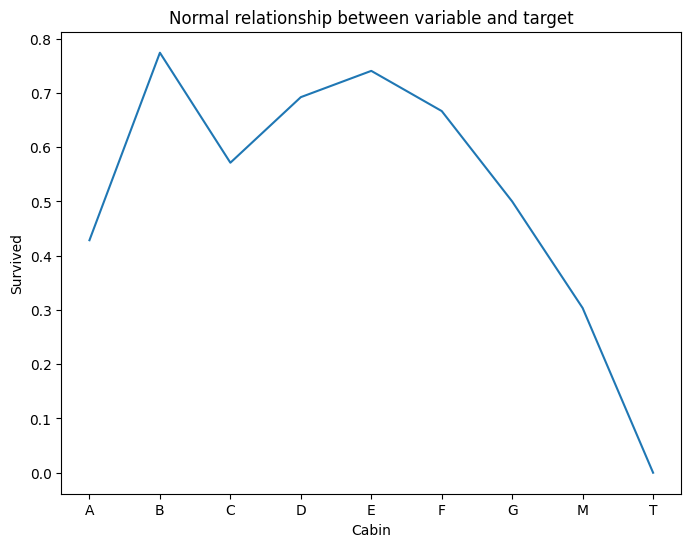

In [63]:
# plot the original variable

fig = plt.figure(figsize=(8,6))
fig = X_train.groupby(['Cabin'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

Text(0, 0.5, 'Survived')

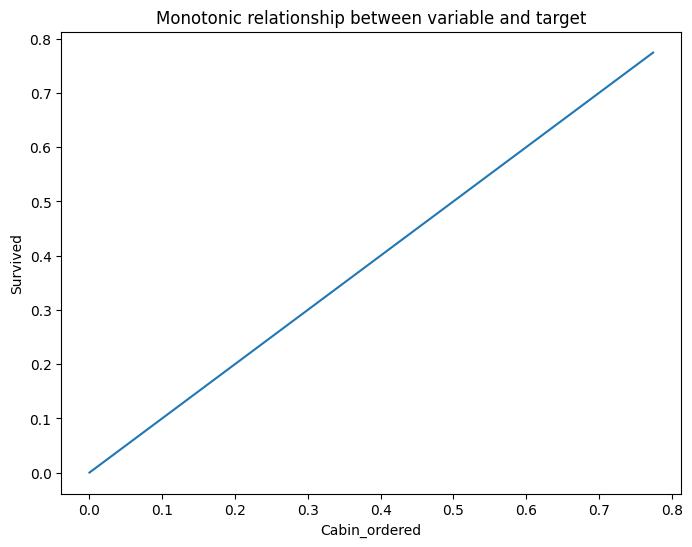

In [64]:
# plot the transformed result: the monotonic variable

fig = plt.figure(figsize=(8,6))
fig = X_train.groupby(['Cabin_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')

### Weight of Evidence (WOE)

In [65]:
X_train.head()

,Cabin,Survived,Cabin_ordered
857,E,1,0.740741
52,D,1,0.692308
386,M,0,0.303609
124,D,0,0.692308
578,M,0,0.303609


In [66]:
X_train.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.428571
B    0.774194
C    0.571429
D    0.692308
E    0.740741
F    0.666667
G    0.500000
M    0.303609
T    0.000000
Name: Survived, dtype: float64

In [67]:
prob_df = X_train.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.428571
B,0.774194
C,0.571429
D,0.692308
E,0.740741
F,0.666667
G,0.500000
M,0.303609
T,0.000000


In [68]:
prob_df = X_train.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df['Died'] = 1-prob_df.Survived
prob_df

,Survived,Died
Cabin,,
A,0.428571,0.571429
B,0.774194,0.225806
C,0.571429,0.428571
D,0.692308,0.307692
E,0.740741,0.259259
F,0.666667,0.333333
G,0.500000,0.500000
M,0.303609,0.696391
T,0.000000,1.000000


In [69]:
# since the log of zero is not defined, let's set this number to something small and non-zero

prob_df.loc[prob_df.Survived == 0, 'Survived'] = 0.00001
prob_df

,Survived,Died
Cabin,,
A,0.428571,0.571429
B,0.774194,0.225806
C,0.571429,0.428571
D,0.692308,0.307692
E,0.740741,0.259259
F,0.666667,0.333333
G,0.500000,0.500000
M,0.303609,0.696391
T,0.000010,1.000000


In [79]:
prob_df['WoE'] = np.log(prob_df.Survived/prob_df.Died)
WoE_dict = prob_df['WoE'].to_dict()
for i,x in WoE_dict.items():
    print(i,x)
prob_df

A -0.2876820724517809
B 1.232143681292632
C 0.28768207245178085
D 0.8109302162163288
E 1.0498221244986774
F 0.6931471805599452
G 0.0
M -0.8301689781242366
T -11.512925464970229


,Survived,Died,WoE
Cabin,,,
A,0.428571,0.571429,-0.287682
B,0.774194,0.225806,1.232144
C,0.571429,0.428571,0.287682
D,0.692308,0.307692,0.810930
E,0.740741,0.259259,1.049822
F,0.666667,0.333333,0.693147
G,0.500000,0.500000,0.000000
M,0.303609,0.696391,-0.830169
T,0.000010,1.000000,-11.512925


In [80]:
X_train['Cabin_ordered'] = X_train.Cabin.map(WoE_dict)
X_test['Cabin_ordered'] = X_test.Cabin.map(WoE_dict)
X_train.head()

,Cabin,Survived,Cabin_ordered
857,E,1,1.049822
52,D,1,0.810930
386,M,0,-0.830169
124,D,0,0.810930
578,M,0,-0.830169


Text(0, 0.5, 'Survived')

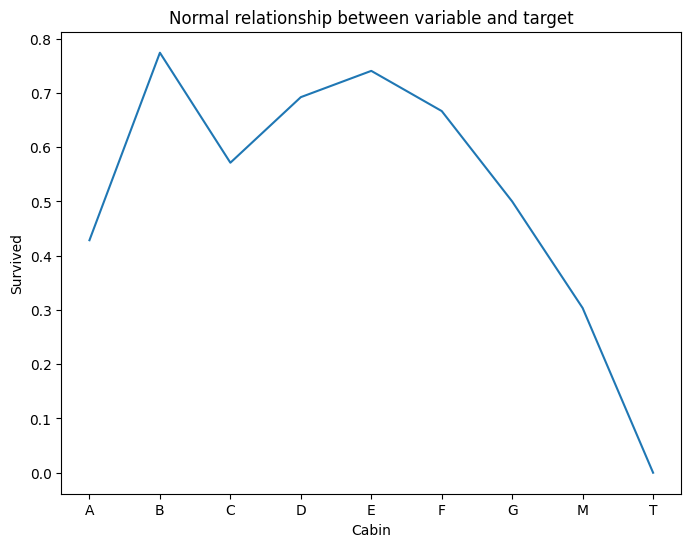

In [81]:
fig = plt.figure(figsize=(8,6))
fig = X_train.groupby(['Cabin'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

Text(0, 0.5, 'Survived')

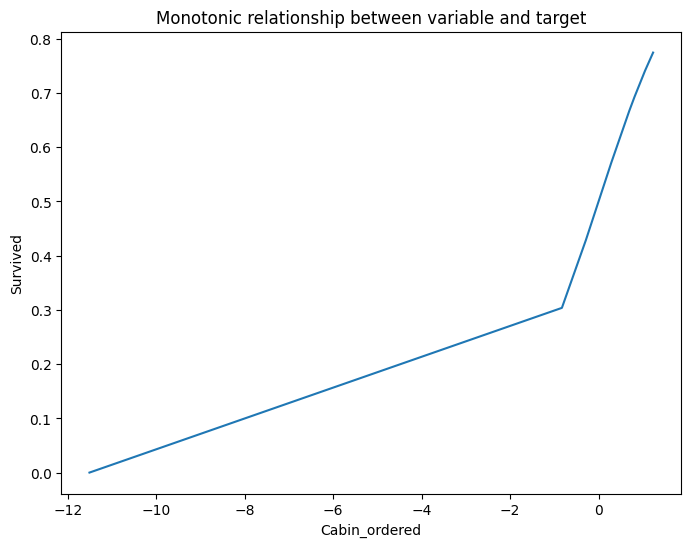

In [82]:
# plot the transformed result: the monotonic variable

fig = plt.figure(figsize=(8,6))
fig = X_train.groupby(['Cabin_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')